* [4.5. Appendix: Code for Figure 4.1](#4.5.-Appendix:-Code-for-Figure-4.1)
* [Exercise 4.1](#Exercise-4.1)
* [Exercise 4.2](#Exercise-4.2)
* [Exercise 4.3](#Exercise-4.3)
* [Exercise 4.4](#Exercise-4.4)
* [Exercise 4.5](#Exercise-4.5)
* [Exercise 4.6](#Exercise-4.6)

## 4.5. Appendix: Code for Figure 4.1

Python version of `RunningProportion.R`

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import numpy as np
np.random.seed(47405)

In [2]:
N = 500 # Specify the total number of flips, denoted N.
p_heads = 0.5 # Specify underlying probability of heads.

In [3]:
# Flip a coin N times and compute the running proportion of heads at each flip.
# Generate a random sample of N flips (heads=1, tails=0):
flip_sequence = np.random.choice([0,1], p=[1-p_heads,p_heads], size=N)

In [4]:
# Compute the running proportion of heads:
r = np.cumsum(flip_sequence) # Cumulative sum: Number of heads at each step.
n = np.linspace(1, N, num=N) # Number of flips at each step.
run_prop = r / n # Component by component division.

In [5]:
# Display the beginning of the flip sequence:
np.array(['T', 'H'])[flip_sequence[:10]].tolist()

['H', 'T', 'H', 'T', 'T', 'H', 'T', 'H', 'H', 'H']

In [6]:
# Display the relative frequency at the end of the sequence.
run_prop[-1]

0.49199999999999999

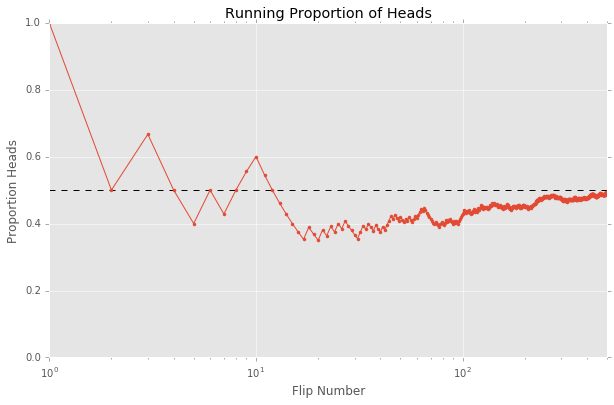

In [7]:
# Graph the running proportion:
plt.figure(figsize=(10,6))
plt.plot(n, run_prop, marker='.')
plt.hlines(p_heads, n[0], n[-1], linestyle='dashed')

plt.ylim([0.0, 1.0])
plt.xscale('log')
plt.xlim(n[0], n[-1])

plt.title('Running Proportion of Heads')
plt.xlabel('Flip Number')
plt.ylabel('Proportion Heads')
plt.show()

## Exercise 4.1

**Purpose**: To gain experience with the `apply` function in R, while dealing with a concrete example of computing conditional probabilities.

In [8]:
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format # 

In [9]:
# load and preview data
df = pd.read_csv('../datasets/HairEyeColor.csv')
df.head()

,Hair,Eye,Sex,Freq
0,Black,Brown,Male,32
1,Brown,Brown,Male,53
2,Red,Brown,Male,10
3,Blond,Brown,Male,3
4,Black,Blue,Male,11


In [10]:
eye_hair_freq = df.groupby(['Eye', 'Hair']).sum() # Sum across sex
# p(eye, hair)
eye_hair_prop = eye_hair_freq / eye_hair_freq.sum() # joint proportions, Table 4.1
eye_hair_prop.rename(columns={'Freq': 'Prop'}, inplace=True)
eye_hair_prop

Prop
Eye   Hair       
Blue  Black  0.03
      Blond  0.16
      Brown  0.14
      Red    0.03
Brown Black  0.11
      Blond  0.01
      Brown  0.20
      Red    0.04
Green Black  0.01
      Blond  0.03
      Brown  0.05
      Red    0.02
Hazel Black  0.03
      Blond  0.02
      Brown  0.09
      Red    0.02

In [11]:
hair_freq = df.groupby('Hair').sum() # Sum across sex and eye
# p(hair)
hair_prop = hair_freq / hair_freq.sum() # marginal proportions, Table 4.1
hair_prop.rename(columns={'Freq': 'Prop'}, inplace=True)
hair_prop

,Prop
Hair,
Black,0.18
Blond,0.21
Brown,0.48
Red,0.12


In [12]:
eye_freq = df.groupby('Eye').sum() # Sum across sex and hair
# p(eye)
eye_prop = eye_freq / eye_freq.sum() # marginal proportions, Table 4.1
eye_prop.rename(columns={'Freq': 'Prop'}, inplace=True)
eye_prop

,Prop
Eye,
Blue,0.36
Brown,0.37
Green,0.11
Hazel,0.16


In [13]:
# probabilities of the hair colors given Blue eyes, p(hair|Blue eyes)
eye_hair_prop.loc['Blue'] / eye_prop.loc['Blue'] # conditional prob, Table 4.2

,Prop
Hair,
Black,0.09
Blond,0.44
Brown,0.39
Red,0.08


In [14]:
# probabilities of the hair colors given Brown eyes, p(hair|brown eyes)
eye_hair_prop.loc['Brown'] / eye_prop.loc['Brown']

,Prop
Hair,
Black,0.31
Blond,0.03
Brown,0.54
Red,0.12


In [15]:
# probabilities of the eye colors given Brown hair, p(eyes|brown hair)
brown_hair_eye_prop = eye_hair_prop.xs('Brown', level=1)
brown_hair_eye_prop / hair_prop.loc['Brown']

,Prop
Eye,
Blue,0.29
Brown,0.42
Green,0.10
Hazel,0.19


## Exercise 4.2

**Purpose**: To give you some experience with random number generation in R.

Set `p_heads = 0.8` in [4.5. Appendix: Code for Figure 4.1](#4.5.-Appendix:-Code-for-Figure-4.1) and re-run the section.

## Exercise 4.3

**Purpose**: To have you work through an example of the logic presented in Section 4.2.1.2.

In [16]:
values = ['9', '10', 'J', 'Q', 'K', 'A']
suits = ['♠︎', '♣︎', '♥︎', '♦︎']
n_suits = len(suits)
n_values = len(values)
n_cards = 48

### Part A

In [17]:
n_10 = 2 * n_suits
p_10 = n_10 / n_cards
p_10

0.16666666666666666

### Part B

In [18]:
n_J = 2 * n_suits
p_10_or_J = (n_10 + n_J) / n_cards
p_10_or_J

0.3333333333333333

## Exercise 4.4

**Purpose**: To give you hands-on experience with a simple probability density function, in R and in calculus, and to reemphasize that density functions can have values larger than 1.

In [19]:
x, dx = np.linspace(0, 1, 50, retstep=True)

In [20]:
p = lambda x: 6 * x * (1 - x) # p(x)
y = p(x)

### Part A

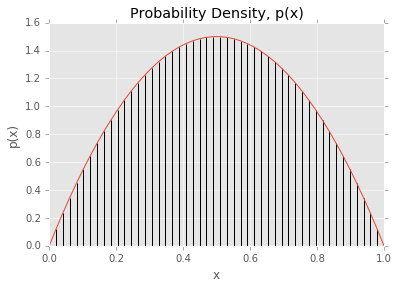

In [21]:
plt.plot(x, y)
plt.vlines(x, 0, y)
plt.xlabel('x')
plt.ylabel('p(x)')
plt.title('Probability Density, p(x)')
plt.show()

In [22]:
area = sum(y * dx)
area

0.99958350687213671

**Part B**
```
p(x) = 6*x*(1 - x) = 6*x - 6*x^2
p(x) = f'(x)
f(x) = 6*x^2/2 - 6*x^3/3 = 3x^2 - 2x^3
f(1) - f(0) = 3 - 2 = 1
```

**Part C**
```
f(x) = 0; x - ?
3 * x^2 - 2 * x^3 = 0
3 - 2 * x = 0
x = 3/2 = 1.5
```

## Exercise 4.5

**Purpose**: To have you use a normal curve to describe beliefs. It’s also handy to know the area under the normal curve between μ and σ.

**Part A**

In [23]:
meanval = 0.0 # Specify mean of distribution.
sdval = 0.2 # Specify standard deviation of distribution.
xlow  = meanval - sdval # Specify low end of x-axis.
xhigh = meanval + sdval # Specify high end of x-axis.

In [24]:
x, dx = np.linspace(xlow, xhigh, 50, retstep=True)

In [25]:
p = lambda x: ( 1/(sdval*np.sqrt(2*np.pi)) ) * np.exp( -((x-meanval)/sdval)**2/2 )
y = p(x)

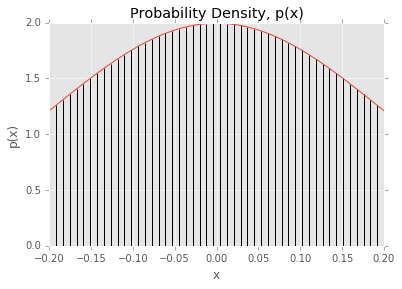

In [26]:
plt.plot(x, y)
plt.vlines(x, 0, y)
plt.xlim([x[0], x[-1]])
plt.xlabel('x')
plt.ylabel('p(x)')
plt.title('Probability Density, p(x)')
plt.show()

In [27]:
area = sum(y * dx)
area

0.69249865841252045

**Part B**

In [28]:
meanval = 162
sdval = (177 - 147) / 2
sdval

15.0

## Exercise 4.6

**Purpose**: Recognize and work with the fact that Equation 4.9 can be solved for the joint probability, which will be crucial for developing Bayes’ theorem.

In [29]:
# p(food|grade)
p_food_grade = [
    [0.3, 0.6, 0.1],
    [0.6, 0.3, 0.1],
    [0.3, 0.1, 0.6]
]

p_food_grade = pd.DataFrame(p_food_grade,
                            index=['grade 1st','grade 6th', 'grade 11th'], 
                            columns=['Ice cream', 'Fruit', 'French fries'])
p_food_grade

,Ice cream,Fruit,French fries
grade 1st,0.30,0.60,0.10
grade 6th,0.60,0.30,0.10
grade 11th,0.30,0.10,0.60


In [30]:
# p(grade)
p_grade = pd.Series([0.2, 0.2, 0.6], index=['grade 1st','grade 6th', 'grade 11th'])
p_grade

grade 1st    0.20
grade 6th    0.20
grade 11th   0.60
dtype: float64

In [31]:
# p(grade, food)
p_join = p_food_grade.copy()
p_join['Ice cream'] = p_food_grade['Ice cream'] * p_grade
p_join['Fruit'] = p_food_grade['Fruit'] * p_grade
p_join['French fries'] = p_food_grade['French fries'] * p_grade
p_join

,Ice cream,Fruit,French fries
grade 1st,0.06,0.12,0.02
grade 6th,0.12,0.06,0.02
grade 11th,0.18,0.06,0.36


In [32]:
p_join.values.sum()

1.0